In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
exam_df = pd.read_csv('datasets/exams.csv')

exam_df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
80,male,group D,bachelor's degree,free/reduced,none,70,72,70
93,female,group E,some high school,standard,none,63,78,69
83,male,group D,associate's degree,standard,none,73,62,60
66,female,group D,high school,standard,none,62,73,69
91,male,group D,some high school,standard,none,70,58,57


In [3]:
exam_df.describe()

,math score,reading score,writing score
count,100.000000,100.000000,100.000000
mean,66.730000,69.980000,69.140000
std,15.631395,13.732642,14.886792
min,18.000000,25.000000,20.000000
25%,58.000000,61.000000,62.000000
50%,69.000000,71.500000,69.000000
75%,78.250000,80.000000,81.000000
max,96.000000,94.000000,93.000000


In [4]:
from sklearn import preprocessing

exam_df[['math score']] = preprocessing.scale(exam_df[['math score']].astype('float64'))
exam_df[['reading score']] = preprocessing.scale(exam_df[['reading score']].astype('float64'))
exam_df[['writing score']] = preprocessing.scale(exam_df[['writing score']].astype('float64'))

In [5]:
exam_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group E,associate's degree,standard,none,0.210248,0.440580,-0.009452
1,female,group C,some college,standard,none,-1.268562,-1.315885,-1.292181
2,male,group E,high school,standard,none,0.531729,0.147836,-0.076964
3,female,group B,some college,free/reduced,completed,-1.461450,-1.315885,-1.022132
4,female,group B,bachelor's degree,standard,completed,0.017360,0.440580,0.733181


In [6]:
exam_df.describe()

,math score,reading score,writing score
count,1.000000e+02,1.000000e+02,1.000000e+02
mean,-2.642331e-16,-3.048950e-16,-4.468648e-17
std,1.005038e+00,1.005038e+00,1.005038e+00
min,-3.133149e+00,-3.291909e+00,-3.317542e+00
25%,-5.613050e-01,-6.572107e-01,-4.820360e-01
50%,1.459522e-01,1.112428e-01,-9.451687e-03
75%,7.406911e-01,7.333242e-01,8.006929e-01
max,1.881947e+00,1.757929e+00,1.610838e+00


In [20]:
exam_df['parental level of education'].unique()

array(["associate's degree", 'some college', 'high school',
       "bachelor's degree", 'some high school', "master's degree"],
      dtype=object)

In [27]:
parent_level_of_education = [
    "some high school",
    "high school",
    "some college",
    "associate's degree",
    "bachelor's degree",
    "master's degree"
]

In [28]:
label_encoding = preprocessing.LabelEncoder()

label_encoding = label_encoding.fit(parent_level_of_education)

In [29]:
exam_df['parental level of education'] = \
    label_encoding.transform(exam_df['parental level of education'].astype(str))

In [30]:
exam_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group E,0,standard,none,0.210248,0.440580,-0.009452
1,female,group C,4,standard,none,-1.268562,-1.315885,-1.292181
2,male,group E,2,standard,none,0.531729,0.147836,-0.076964
3,female,group B,4,free/reduced,completed,-1.461450,-1.315885,-1.022132
4,female,group B,1,standard,completed,0.017360,0.440580,0.733181


In [31]:
label_encoding.classes_

array(["associate's degree", "bachelor's degree", 'high school',
       "master's degree", 'some college', 'some high school'],
      dtype='<U18')

In [32]:
exam_df = pd.get_dummies(exam_df, columns=['race/ethnicity'])

exam_df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,female,0,standard,none,0.210248,0.440580,-0.009452,0,0,0,0,1
1,female,4,standard,none,-1.268562,-1.315885,-1.292181,0,0,1,0,0
2,male,2,standard,none,0.531729,0.147836,-0.076964,0,0,0,0,1
3,female,4,free/reduced,completed,-1.461450,-1.315885,-1.022132,0,1,0,0,0
4,female,1,standard,completed,0.017360,0.440580,0.733181,0,1,0,0,0


In [33]:
exam_df = pd.get_dummies(exam_df, columns=['gender',
                                           'lunch',
                                           'test preparation course'])

In [34]:
exam_df.head()

,parental level of education,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,0,0.210248,0.440580,-0.009452,0,0,0,0,1,1,0,0,1,0,1
1,4,-1.268562,-1.315885,-1.292181,0,0,1,0,0,1,0,0,1,0,1
2,2,0.531729,0.147836,-0.076964,0,0,0,0,1,0,1,0,1,0,1
3,4,-1.461450,-1.315885,-1.022132,0,1,0,0,0,1,0,1,0,1,0
4,1,0.017360,0.440580,0.733181,0,1,0,0,0,1,0,0,1,1,0


In [35]:
from sklearn.model_selection import train_test_split

X = exam_df.drop('math score', axis=1)
Y = exam_df['math score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


In [50]:
x_train.shape, x_test.shape

((80, 14), (20, 14))

In [51]:
y_train.shape, y_test.shape

((80,), (20,))

In [52]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(fit_intercept=True).fit(x_train, y_train)

In [53]:
print("Training_score : " , linear_model.score(x_train, y_train))

Training_score :  0.8872483545319276


In [54]:
y_pred = linear_model.predict(x_test)

In [55]:
from sklearn.metrics import r2_score

print("Testing_score : ", r2_score(y_test, y_pred))

Testing_score :  0.8896833267681791


In [56]:
linear_model = LinearRegression(fit_intercept=False).fit(x_train, y_train)

In [57]:
print("Training_score : " , linear_model.score(x_train, y_train))

Training_score :  0.8872483545319276


In [58]:
y_pred = linear_model.predict(x_test)

In [59]:
print("Testing_score : ", r2_score(y_test, y_pred))

Testing_score :  0.8896833267681793


In [60]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})

df_pred_actual.head(10)

,predicted,actual
26,0.665130,0.788913
35,0.275603,-0.046936
82,1.308692,1.367578
63,-0.299598,-0.818489
93,0.275530,-0.239824
8,0.627291,0.981802
3,-1.602021,-1.461450
85,0.326297,0.338840
59,0.825152,0.596025
54,0.773258,0.917505


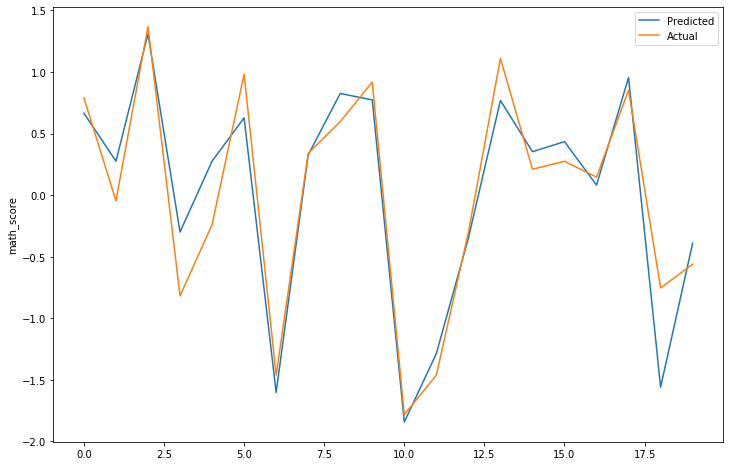

In [62]:
plt.figure(figsize = (12, 8))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('math_score')

plt.legend()
plt.show()

In [63]:
X = exam_df.drop(['math score', 'writing score', 'reading score'], axis=1)
Y = exam_df['math score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression(fit_intercept=True).fit(x_train, y_train)
print("Training_score : " , linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)
print("Testing_score : ", r2_score(y_test, y_pred))

Training_score :  0.32863474310144436
Testing_score :  0.19969464490098654


In [64]:
X = exam_df.drop(['math score', 'writing score'], axis=1)
Y = exam_df['math score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression(fit_intercept=True).fit(x_train, y_train)
print("Training_score : " , linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)
print("Testing_score : ", r2_score(y_test, y_pred))

Training_score :  0.8449738913271222
Testing_score :  0.7760347364818619
